# Week 4: Tasks

1. Find helpers for visualization and loading data in `helpers.py`. Please make sure to go through them so you understand their purpose. Feel free to tweak these or add your ones.

2. First approach the theoretical tasks to make sure you can understand and frame the problems correctly.

3. Solve the programming tasks making use of the helpers.

---

## Theoretical Tasks: framing convex programs

Write up your solutions (brief explanations) in markdown.



**Problem 0: Were you listening?**

For each of the following optimization problems:
1. State whether it is a **convex optimization problem** or **not**.
2. Justify your answer briefly (one sentence is enough).

#### (a)
$$
\begin{aligned}
\min_{x \in \mathbb{R}^n} \quad & x^\top Q x + c^\top x \\
\text{s.t.} \quad & Ax = b
\end{aligned}
$$

where $Q \succeq 0$, $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$.

**Answer** : Convex

**Reason** : The objective $x^T Q x + c^T x$ is convex because $Q \succeq 0$ (positive semi-definite), and the constraint $Ax=b$ is linear (affine). This is a standard Quadratic Program (QP).

#### (b)
$$
\begin{aligned}
\min_{x \in \mathbb{R}^n} \quad & \|x\|_2^2 \\
\text{s.t.} \quad & \|Ax\|_2 \ge 1
\end{aligned}
$$
where $A \in \mathbb{R}^{m \times n}$.

**Answer** : Not Convex

**Reason** : The constraint $\|Ax\|_2 \ge 1$ defines the region outside an ellipsoid. This is not a convex set (A convex set must contain the line segment between any two points).

#### (c)
$$
\begin{aligned}
\max_{w \in \mathbb{R}^n} \quad & (\mu^\top w)(\mathbf{1}^\top w) \\
\text{s.t.} \quad & w \ge 0
\end{aligned}
$$

where $\mu \in \mathbb{R}^n$ is fixed.

**Answer** : Not Convex

**Reason** : Maximizing $(\mu^T w)(\mathbf{1}^T w)$ is equivalent to maximizing a quadratic form $w^T (\mu \mathbf{1}^T) w$. We are maximizing a convex function, which is generally non-convex.

---

**Problem 1: Minimum-norm Feasibility**
  
You are given a system of linear equations $Cx=d$, where $C\in\mathbb{R}^{k\times n}$ has full row rank and $d\in\mathbb{R}^k$.  
Among all vectors $x$ that satisfy the constraints, you wish to select one that is in some sense “small”.

1. Formulate this task as a **convex optimization problem**.
2. Argue why the problem is feasible and has a unique solution.
3. *(Bonus)* Derive a closed-form expression for the optimal solution.

*Hints*  
- What properties must the objective function satisfy? Try reasoning about it to come up with a metric that preserves these properties and is convex.
- Lagrange multipliers and first-order optimality conditions are sufficient to solve the problem explicitly (part 3).

**Answer :**

Formulation: $$ \min_x \ \|x\|_2 \quad \text{s.t.} \quad Cx = d $$

**Feasibility**: Since $C$ has full row rank ($k \le n$), the system $Cx=d$ is underdetermined and guaranteed to have solutions (image of $C$ is $\mathbb{R}^k$).

**Uniqueness**: The objective function $f(x) = \|x\|_2^2$ is strictly convex. The intersection of a strictly convex function with a convex set (linear subspace) has at most one global minimum.

**Closed-form (Bonus)**: Using Lagrange multipliers for $\min \frac{1}{2}x^T x + \nu^T (Cx - d)$:

$x + C^T \nu = 0 \implies x = -C^T \nu$.

Substitute into constraint: $C(-C^T \nu) = d \implies -(CC^T)\nu = d$.

Solve for $\nu$: $\nu = -(CC^T)^{-1}d$.

Substitute back: $x^* = C^T (CC^T)^{-1} d$.

---


**(BONUS) Problem 2: Stochastic Robust Approximation**

Consider a linear approximation problem in which the data matrix is uncertain. Let
$$
A=\bar A+U,
$$
where $U$ is a random matrix with $\mathbb{E}[U]=0$. The goal is to choose $x$ that performs well *on average* under this uncertainty.

1. **Stochastic robust objective.**  
   Consider the problem
   $$
   \min_x \; \mathbb{E}\,\|Ax-b\|.
   $$
   - Show that this is a convex optimization problem.  
   - If $A$ takes finitely many values $\{A_i\}_{i=1}^k$ with probabilities $p_i$, rewrite the objective explicitly and express the problem as a deterministic convex program.  
   - Comment briefly on when this formulation can be written as an LP or an SOCP, depending on the choice of norm. ([This](https://zhengy09.github.io/ECE285/lectures/L6.pdf) might help).

2. **Quadratic specialization.**  
   Now consider the least-squares variant
   $$
   \min_x \; \mathbb{E}\,\|Ax-b\|_2^2.
   $$
   - Show that the objective can be written as the sum of a nominal least-squares term and an additional quadratic term involving $x$.  
   - *(Bonus $^2$)* Use this structure to derive a closed-form solution.

3. **Discussion.**  
   - How does uncertainty in $A$ influence the geometry and conditioning of the solution?

---

## Task 0: Store week 2/3 data and read it in
Use helpers to store your expected returns and risk data along with tickers, and read them to load them into this notebook.

See usage in `intro_to_cvxpy.ipynb` in the fully solved example.

NOTE: The week 2 models only predict expected returns ($\hat\mu$), we compute $\hat\Sigma$ as simple covariance matrix of the tickers' returns data for now. In reality predicting $\hat\Sigma$ is a big challenge (perhaps bigger than predicting $\hat\mu$) but we overlook those concerns for now.

For eg: `Sigma_hat = np.cov(returns, rowvar=False)`, where `returns` contains the returns data series for the tickers we are studying.

In [23]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
from helpers import (
    save_predictions,
    load_predictions,
    plot_mu_and_cov,
    visualize_weights_stacked,
    visualize_return_risk,
    compute_sharpe_ratios,
    plot_sharpe_ratios,
    print_sharpe_table,
)

In [24]:
# TODO: assuming u saved your data in `predicted.npz`

# mu, Sigma, tickers = load_predictions('predicted.npz')
mu_hat, Sigma_hat, tickers = load_predictions('../week2/predictions.npz')

# Verify shapes
print("Tickers:", tickers) # Should be ['AAPL']
print("mu_hat:", mu_hat.shape) # Should be (1,)
print("Sigma_hat:", Sigma_hat.shape) # Should be (1, 1)

Tickers: ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']
mu_hat: (5,)
Sigma_hat: (5, 5)


Tickers: ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']
Expected Returns (mu_hat) shape: (5,)
Covariance (Sigma_hat) shape: (5, 5)


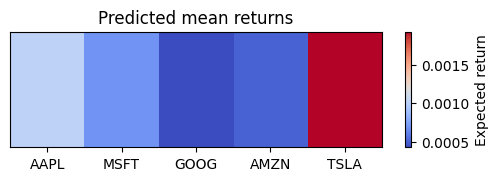

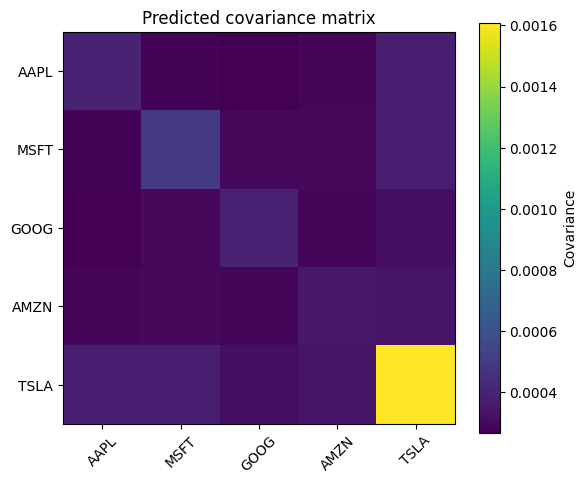

In [25]:
# TODO: plot the data using helpers (and maybe print some lines) to confirm
print("Tickers:", tickers)
print("Expected Returns (mu_hat) shape:", mu_hat.shape)
print("Covariance (Sigma_hat) shape:", Sigma_hat.shape)
plot_mu_and_cov(mu_hat, Sigma_hat, tickers=tickers)

## Task 1. Baseline portfolios

### Task 1.1 Equal weight portfolio

In [37]:
# TODO: define `w_equal` to be the portfolio with equal weights on all assets
n_assets = len(mu_hat)
w_equal = np.ones(n_assets) / n_assets

print("Equal Weights:", w_equal)

Equal Weights: [0.2 0.2 0.2 0.2 0.2]


### Task 1.2 Global Minimum Variance Portfolio, without long-only constraint
Formally, define the problem of **minimizing $\mathbf{w}^\top \Sigma \mathbf{w}$ subject to $\mathbf{1}^\top \mathbf{w} = 1$**. This gives the minimum variance portfolio, a reasonable baseline for evaluation, see Sec 6.5.1 of the book for a formal definition.

(without the long-only constraint) The solution can be written analytically as:
$$
\mathbf{w} = \frac{1}{\mathbf{1}^\top \Sigma^{-1} \mathbf{1}} \Sigma^{-1}\mathbf{1}
$$

Compute this using numpy. This our second baseline.

In [38]:
# TODO: define `w_minvar` according to above. use `np.linalg.inv` to take inverse.
Sigma_inv = np.linalg.inv(Sigma_hat)
ones = np.ones(len(mu_hat))

numerator = Sigma_inv @ ones
denominator = ones.T @ Sigma_inv @ ones

w_minvar = numerator / denominator

print("Min Var Weights:", np.round(w_minvar, 4))

Min Var Weights: [ 0.299   0.1081  0.29    0.335  -0.0321]


---

## Task 2. Markowitz Optimization - Additional constraints

We add two additional constraints:
1. Leverage limit - leverage defines the "total" asset positions as L1 norm $|| w ||_1$.
2. Maximum position limit - limit the maximum weight that can be placed on one asset to force diversification. For simplicity we use a scalar $u$ and enforce $|w_i| \le u; \forall i=1\dots n$

> Fruther on these definitions: A [paper](https://web.stanford.edu/~boyd/papers/pdf/markowitz.pdf) by Stephen Boyd, see pages 13-15.

### Task 2.1: Write a helper function in similar spirit to the one in the intro notebook.

Formally it should implement the following convex program:

$$
\begin{align*}
\max_w \quad & \mu^\top w - \lambda w^\top \Sigma w \\
\text{s.t.}\quad & \mathbf{1}^\top w = 1 & \text{(fully invested)} \\
& w \ge \mathbf{0} & \text{(long only)} \\
& ||w||_1 \le \gamma & \text{(leverage limit)} \\
\forall i \quad & |w_i| \le u  & \text{(max position limit)} \\
\end{align*}
$$

The helper should take lambda, gamma and u as inputs along with mu and Sigma.

In [39]:
# TODO

def markowitz_portfolio(mu, Sigma, lam, gamma=2.0, u=1.0):
    """
    Solves the Markowitz problem with leverage and position limits.
    """
    n = len(mu)
    w = cp.Variable(n)
    
    # Define risk (quadratic form: w^T * Sigma * w)
    risk = cp.quad_form(w, Sigma)
    
    # Objective: Maximize (Return - lambda * Risk)
    objective = cp.Maximize(mu @ w - lam * risk)
    
    constraints = [
        cp.sum(w) == 1,         # Fully invested
        w >= 0,                 # Long only
        cp.norm(w, 1) <= gamma, # Leverage limit
        w <= u                  # Max position limit
    ]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    return w.value

### Task 2.2 Vary different parameters and study the portfolios obtained

As a baseline use $\lambda = 1.2; \; \gamma = 1.6 \; u = 0.8$. You may tweak this if you like.

Try any subset of these; the goal is to analyze performance and possibly interpret the results to identify the best set of parameters.

1. Vary $\lambda$ over $0.01, 0.1, 1.0, 3.5, 10.0$
2. Vary $\gamma$ over $1.4, 1.6, 1.8$
3. Vary $u$ over $0.6, 0.8, 0.95$

Then, Collect your results as `weights, returns, variances` : 2D numpy arrays as an example:
```python
# demo
lams = np.logspace(-2, 2, 15)

weights = []
returns = []
variances = []

for lam in lams:
    w = markowitz_portfolio(mu_hat, Sigma_hat, lam)
    weights.append(w)
    returns.append(mu_hat @ w)
    variances.append(w.T @ Sigma_hat @ w)

weights = np.array(weights)
returns = np.array(returns)
variances = np.array(variances)
```

> If you're really comfortable with python you might be able to abstract this away in a wrapped functions or use decorators to prevent rewriting this same template every time. But that's not necessary.


In [40]:
# TODO: run for loop(s) to test out these hyperparameter tunings
# if you would like to do a full exploration of the state space there is a python library that allows you to take cross product of sets
lams = np.logspace(-2, 2, 20)  # Sweep lambda from 0.01 to 100

weights_ef = []
returns_ef = []
variances_ef = []

for lam in lams:
    # We use default gamma=1.6, u=0.8 as suggested in instructions
    w = markowitz_portfolio(mu_hat, Sigma_hat, lam, gamma=1.6, u=0.8)
    
    if w is not None:
        weights_ef.append(w)
        returns_ef.append(mu_hat @ w)
        variances_ef.append(w.T @ Sigma_hat @ w)

weights_ef = np.array(weights_ef)
returns_ef = np.array(returns_ef)
variances_ef = np.array(variances_ef)

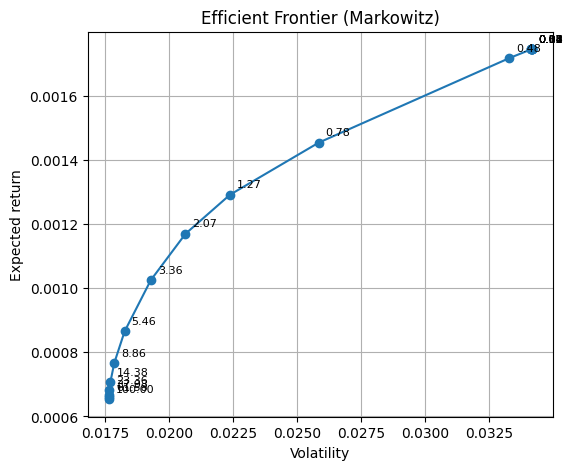

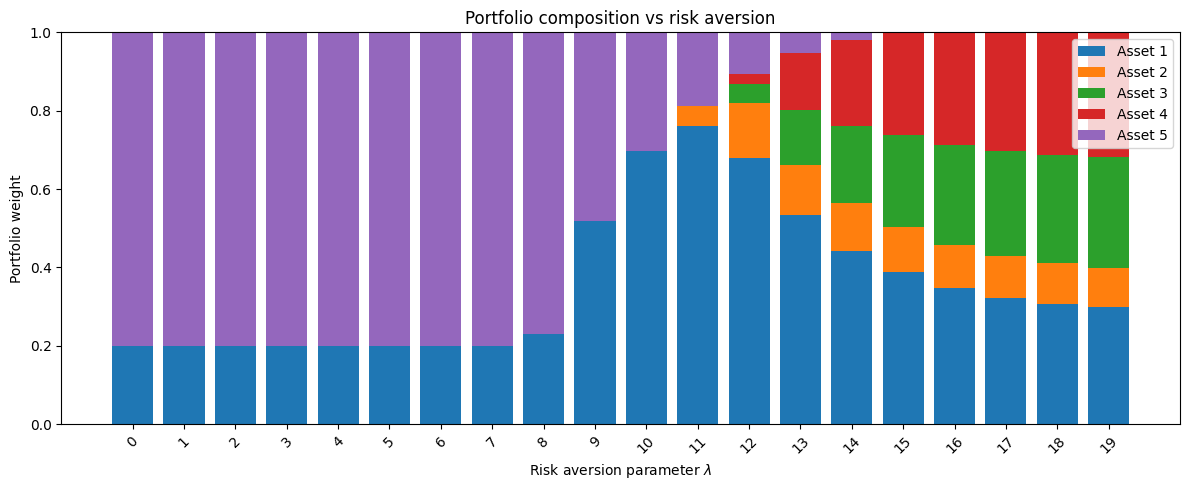

In [55]:
# TODO: visualize the portfolios using the helpers or use your own
lam_labels = [f"{lam:.2f}" for lam in lams]
visualize_return_risk(returns_ef, variances_ef, lam_labels)
visualize_weights_stacked(weights_ef)

---
## Task 3. Robust (adversarial) optimization

We now model uncertainty in predicted returns.

#### Uncertainty model

We assume the true return vector lies in an $\ell_2$-ball around the predicted value:
$$
\mu = \hat\mu + \delta,
\qquad
\|\delta\|_2 \le \epsilon.
$$

> Note this is NOT the same as the $\ell_\infty$-ball error described in the README. Convince yourself that they do not correspond to the same minimization problem.

The robust optimization problem is
$$
\begin{aligned}
\max_w \min_{\|\delta\|_2 \le \epsilon}
\;& (\hat\mu + \delta)^\top w - \lambda\, w^\top \Sigma w \\
\text{s.t. } & \mathbf{1}^\top w = 1,\quad w \ge 0.
\end{aligned}
$$

Interestingly, this reduces to the convex program
$$
\begin{aligned}
\max_w \;& \hat\mu^\top w - \epsilon \|w\|_2 - \lambda\, w^\top \Sigma w \\
\text{s.t. } & \mathbf{1}^\top w = 1,\quad w \ge 0.
\end{aligned}
$$

This allows us to easily implement it in cvxpy.

---

### Task 3.1 - Implement the robust Markowitz solver
Write a helper similar to task 2.1

In [61]:
# TODO: 
def robust_markowitz(mu, Sigma, lam, eps):
    mu = np.asarray(mu).flatten()
    Sigma = np.asarray(Sigma)
    n = mu.shape[0]

    Sigma = 0.5 * (Sigma + Sigma.T) + 1e-8 * np.eye(n)

    w = cp.Variable(n)

    objective = cp.Maximize(mu @ w - eps * cp.norm2(w) - lam * cp.quad_form(w, Sigma))
    constraints = [cp.sum(w) == 1, w >= 0]

    prob = cp.Problem(objective, constraints)

    try:
        prob.solve(solver=cp.ECOS, verbose=False)
    except Exception:
        prob.solve(solver=cp.SCS, verbose=False)

    if w.value is None:
        raise RuntimeError("Robust optimization failed (solver returned None).")

    return np.asarray(w.value).flatten()

### Perturbation analysis

The robust formulation provides a worst-case guarantee.
We can analyze it with an empirical sensitivity experiment.

The goal is to sample perturbations $\delta$ uniformly from the $\ell_2$ ball of radius $\epsilon$ and evaluate portfolio performance under these perturbed returns.

> This is similar to the kind of analysis done using Monte Carlo methods

### Task 4.2 - Empirical robustness via perturbation analysis

For perturbing the returns vector use this helper `sample_l2_perturbations` to generate a 2D array of perturbed vectors - our samples.

> Specifically, we generate a random direction $u/||u||_2$ where $u \sim \mathcal{N}(0, I)$ and random length $d \sim \text{Uniform}(0,\epsilon)$


In [63]:
def sample_l2_perturbations(n, eps, num_samples, seed=None):
    """
    Sample perturbations uniformly from the l2 ball of radius eps.
    """
    if seed is not None:
        np.random.seed(seed)

    deltas = []
    radii = []
    for _ in range(num_samples):
        u = np.random.randn(n)
        u = u / np.linalg.norm(u)        # random direction
        r = np.random.uniform(0, eps)    # random radius
        deltas.append(r * u)
        radii.append(r)

    return np.array(deltas), np.array(radii)

Set $\lambda = 1.2, \epsilon = 0.1$, use $\text{num\_sample}=100$ and generate the portfolios and deltas.

In [64]:
# TODO: first run the markowitz_portfolio and robust_markowitz functions to get portfolios
# remember robust_markowitz takes an additional eps parameter
# Standard vs Robust portfolios + perturbations
lam = 1.2
eps = 0.1
num_samples = 100

w_std = markowitz_portfolio(mu_hat, Sigma_hat, lam=lam)           
w_rob = robust_markowitz(mu_hat, Sigma_hat, lam=lam, eps=eps)      

deltas, radii = sample_l2_perturbations(len(mu_hat), eps, num_samples, seed=42)

print("w_std sum:", w_std.sum(), " | w_rob sum:", w_rob.sum())
print("Avg perturbation radius:", radii.mean())
# solve portfolios
#...

# sample perturbations
# NOTE: use
#deltas, _ = sample_l2_perturbations(len(mu), eps, num_samples)

w_std sum: 1.0000000032096334  | w_rob sum: 0.9999999999999905
Avg perturbation radius: 0.053454792533898295


Evaluate the portfolios under the list of perturbed means and collect results in 1D arrays `ret_std` and `ret_rob` (for eg).

In [65]:
# TODO: evaluate the portfolios under perturbations and collect results
# remember to use `mu_perturbed = mu + delta` for each delta in deltas
mu_perturbed = mu_hat.reshape(1, -1) + deltas   # shape (num_samples, n_assets)

ret_std = mu_perturbed @ w_std
ret_rob = mu_perturbed @ w_rob

print("Standard: mean/median/min =", np.mean(ret_std), np.median(ret_std), np.min(ret_std))
print("Robust:   mean/median/min =", np.mean(ret_rob), np.median(ret_rob), np.min(ret_rob))

Standard: mean/median/min = 8.527718770283359e-06 0.0006686097413336564 -0.04906943892013449
Robust:   mean/median/min = 0.0006656837164394642 0.001121436023500701 -0.03629050957814409


Visualize your results and answer these questions:
- Plot histograms of the data points (realized portfolio returns) in both arrays and analyze visually. What do you observe?
- Print out summary statistics
    - Mean, Median, Worst (minimum return)

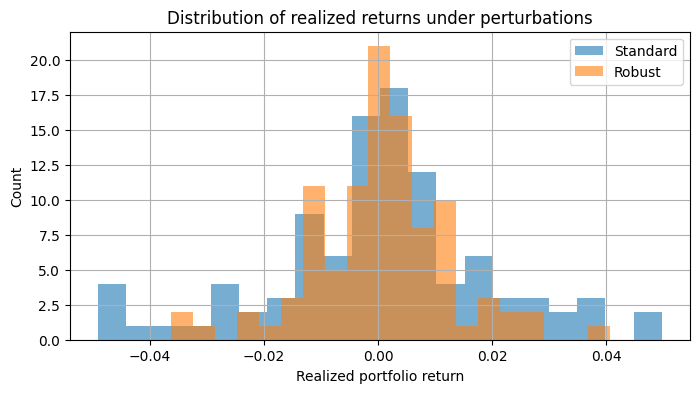

 Standard | mean= 0.000009 | median= 0.000669 | worst(min)=-0.049069
   Robust | mean= 0.000666 | median= 0.001121 | worst(min)=-0.036291


In [66]:
# TODO: visualize results
plt.figure(figsize=(8, 4))
plt.hist(ret_std, bins=20, alpha=0.6, label="Standard")
plt.hist(ret_rob, bins=20, alpha=0.6, label="Robust")
plt.xlabel("Realized portfolio return")
plt.ylabel("Count")
plt.title("Distribution of realized returns under perturbations")
plt.legend()
plt.grid(True)
plt.show()

def summarize(x, name):
    x = np.asarray(x)
    print(f"{name:>9} | mean={x.mean(): .6f} | median={np.median(x): .6f} | worst(min)={x.min(): .6f}")

summarize(ret_std, "Standard")
summarize(ret_rob, "Robust")

### Task 4.3 (Bonus) But how poorly does standard optimization do?
This analysis does not really show "how" the standard portfolio performance degrades as delta grows larger. For that we can make a scatter plot of the form
$$(||\delta||, \text{realized returns on } \hat\mu+\delta)$$
For both portfolios. Try doing this and analyzing the result. Helper code is given.

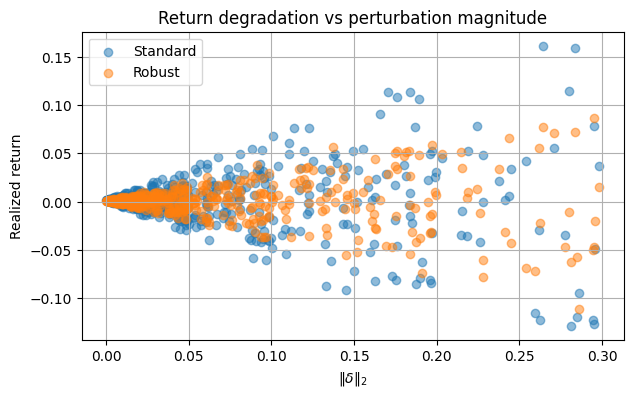

In [67]:
# TODO: run the same code as above (perhaps different epsilons)

# visualize results
# NOTE: assumes radii, ret_std, ret_rob are defined from above code
lam = 1.2
num_samples = 100
eps_grid = [0.02, 0.05, 0.10, 0.20, 0.30]

radii = []
ret_std = []
ret_rob = []

for eps in eps_grid:
    w_std_eps = markowitz_portfolio(mu_hat, Sigma_hat, lam=lam)
    w_rob_eps = robust_markowitz(mu_hat, Sigma_hat, lam=lam, eps=eps)

    deltas_eps, _ = sample_l2_perturbations(len(mu_hat), eps, num_samples, seed=123)
    mu_pert = mu_hat.reshape(1, -1) + deltas_eps

    radii.extend(np.linalg.norm(deltas_eps, axis=1))
    ret_std.extend(mu_pert @ w_std_eps)
    ret_rob.extend(mu_pert @ w_rob_eps)

radii = np.asarray(radii)
ret_std = np.asarray(ret_std)
ret_rob = np.asarray(ret_rob)

plt.figure(figsize=(7, 4))
plt.scatter(radii, ret_std, alpha=0.5, label="Standard")
plt.scatter(radii, ret_rob, alpha=0.5, label="Robust")

plt.xlabel(r"$\|\delta\|_2$")
plt.ylabel("Realized return")
plt.title("Return degradation vs perturbation magnitude")
plt.legend()
plt.grid(True)
plt.show()